In [17]:
import pandas as pd
import base64
from PIL import Image
from io import BytesIO
import json
from IPython.display import display, HTML

# Sample function to convert an image to a base64 string with a prefix
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode('utf-8')
        return f"data:image/jpeg;base64,{base64_image}"

# Function to decode base64 string to an image
def base64_to_image(base64_str):
    image_data = base64.b64decode(base64_str.split(',')[1])  # Remove prefix before decoding
    return Image.open(BytesIO(image_data))

In [15]:
#EASY TEST

# Sample DataFrame creation
data = {
    'id': [1, 2],
    'name': ['Image1', 'Image2'],
    'image_path': ['image1.jpg', 'image2.jpg']
}

df = pd.DataFrame(data)

# Add a new column with base64 encoded images
df['image_base64'] = df['image_path'].apply(image_to_base64)

# Remove the original image path if not needed
df.drop(columns=['image_path'], inplace=True)

# Write to JSONL file
with open('output.jsonl', 'w') as file:
    for _, row in df.iterrows():
        json_record = row.to_json()
        file.write(f"{json_record}\n")


In [18]:
#COMBINED TEST
data = {
    'id': [1, 2, 3, 4],
    'name': ['Entry1', 'Entry2', 'Entry3', 'Entry4'],
    'content': [
        'img_path=image1.jpg',
        'Some random text',
        'img_path=image2.jpg',
        'Another random text'
    ]
}


df = pd.DataFrame(data)

# Add a new column with base64 encoded images when applicable
def process_content(content):
    if content.startswith('img_path='):
        image_path = content.split('=', 1)[1]
        return image_to_base64(image_path)
    else:
        return None
    
df['image_base64'] = df['content'].apply(process_content)

# Write to JSONL file
with open('output.jsonl', 'w') as file:
    for _, row in df.iterrows():
        json_record = row.to_json()
        file.write(f"{json_record}\n")


,id,name,content,image
0,1,Entry1,img_path=image1.jpg,
1,2,Entry2,Some random text,
2,3,Entry3,img_path=image2.jpg,
3,4,Entry4,Another random text,

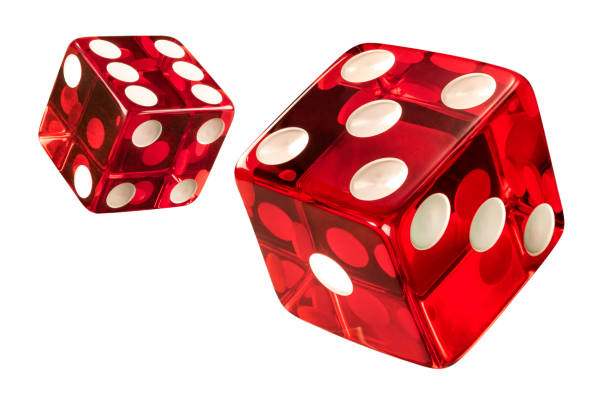
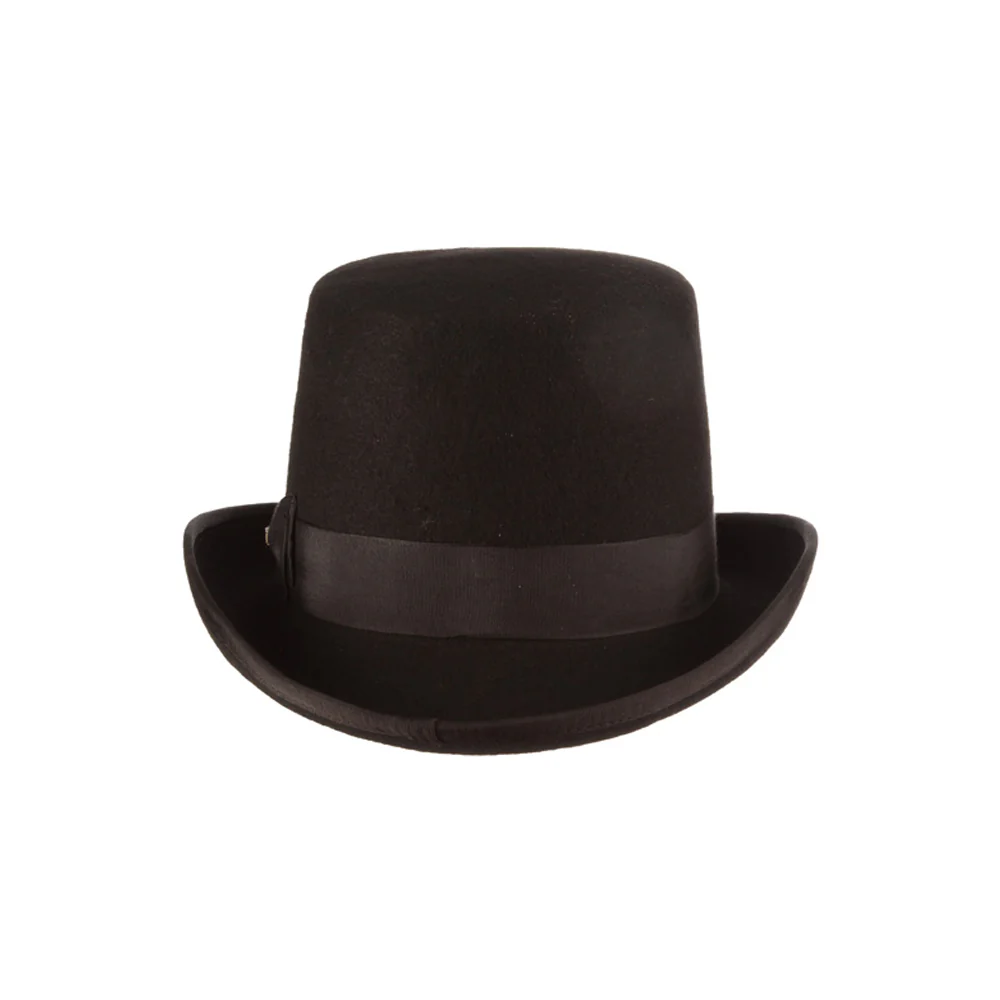

In [19]:
#COMBINED TEST
# Load JSONL file into a DataFrame
records = []
with open('output.jsonl', 'r') as file:
    for line in file:
        record = json.loads(line.strip())
        records.append(record)

df_loaded = pd.DataFrame(records)

def render_image(base64_str):
    if pd.isna(base64_str):  # Skip if no base64 string is provided
        return ""
    img = base64_to_image(base64_str)
    buffer = BytesIO()
    img.save(buffer, format="PNG")
    img_b64 = base64.b64encode(buffer.getvalue()).decode()
    return f'<img src="data:image/png;base64,{img_b64}" width="100"/>'

# Apply the rendering function to the 'image_base64' column
df_loaded['image'] = df_loaded['image_base64'].apply(render_image)

# Drop the base64 column if not needed for display
df_loaded.drop(columns=['image_base64'], inplace=True)

# Convert the DataFrame to HTML for display
html = df_loaded.to_html(escape=False, formatters={'image': lambda x: x})

# Display the DataFrame with images
display(HTML(html))

,id,name,image
0,1,Image1,
1,2,Image2,

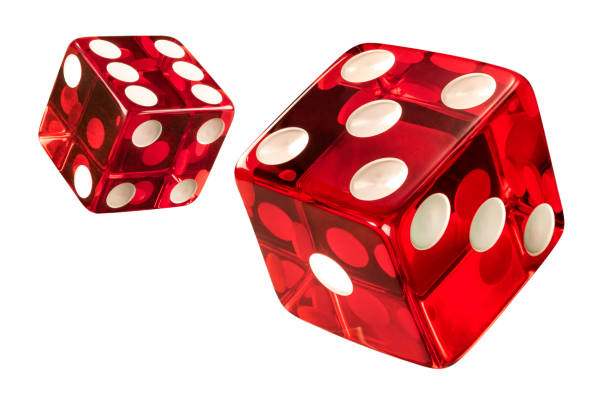
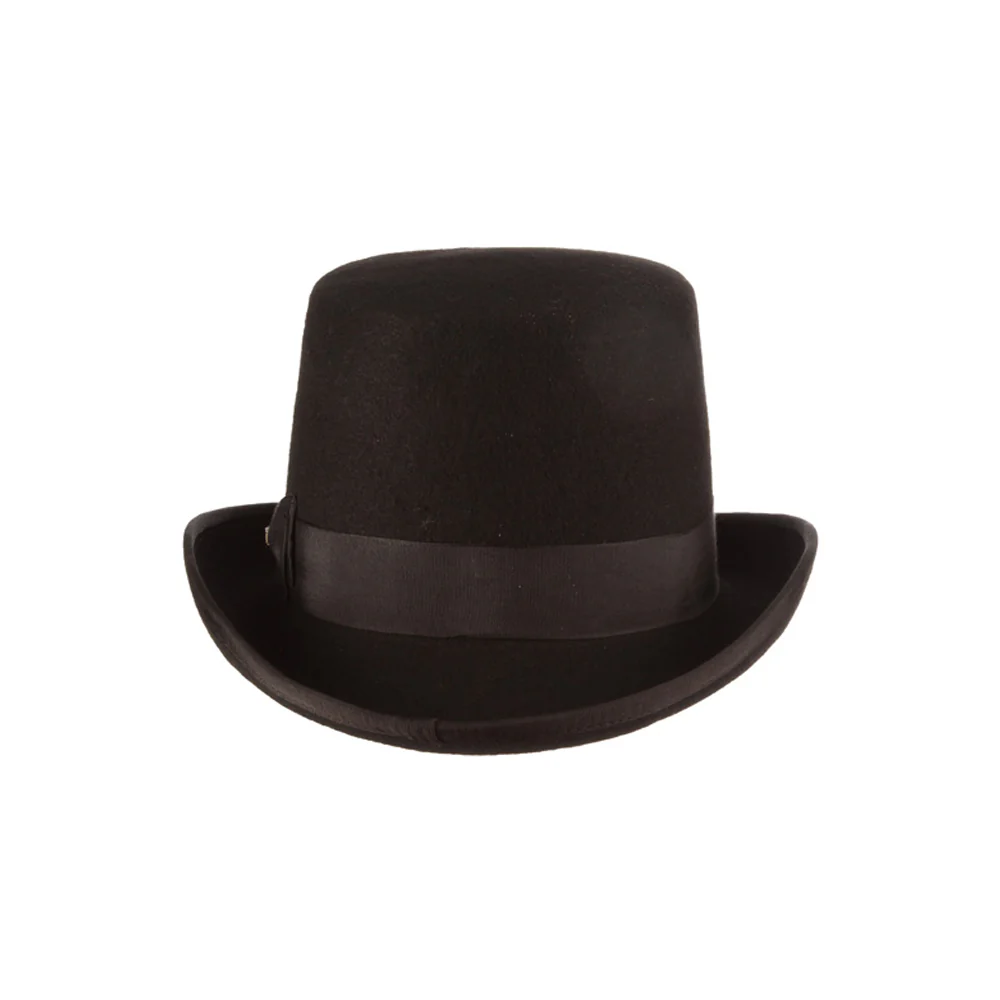

In [ ]:
#EASY TEST
# Load JSONL file into a DataFrame
records = []
with open('output.jsonl', 'r') as file:
    for line in file:
        record = json.loads(line.strip())
        records.append(record)

df_loaded = pd.DataFrame(records)

# Display DataFrame with images
def render_image(base64_str):
    img = base64_to_image(base64_str)
    buffer = BytesIO()
    img.save(buffer, format="PNG")
    img_b64 = base64.b64encode(buffer.getvalue()).decode()
    return f'<img src="data:image/png;base64,{img_b64}" width="100"/>'

# Apply the rendering function to the 'image_base64' column
df_loaded['image'] = df_loaded['image_base64'].apply(render_image)

# Drop the base64 column if not needed for display
df_loaded.drop(columns=['image_base64'], inplace=True)

# Convert the DataFrame to HTML for display
html = df_loaded.to_html(escape=False, formatters={'image': lambda x: x})

# Display the DataFrame with images
display(HTML(html))